# Исследование оттока клиентов сети фитнес-центров 

## Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

## Изучение и предобработка данных

In [2]:
churn = pd.read_csv('/datasets/gym_churn.csv')
churn.head(15)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [3]:
churn.info()
print(churn.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
#поищем пропуски
churn.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

>1. В датасете всего 14 признаков и 4000 наблюдений  
>2. В признаках нет пропусков  
>3. Формат данных везде указан верный  
>4. Стоит привести названия признаков к нижнему регистру, проверить данные на дубликаты

In [5]:
#приведем названия признаков к нижнему регистру
churn.columns = churn.columns.str.lower()
#churn.head()

In [6]:
#проверим данные на дубликаты
print('Количество дубликатов в датасете churn:', churn.duplicated().sum())

Количество дубликатов в датасете churn: 0


## Исследовательский анализ данных

In [7]:
#изучим датасет глубже
churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


>1. В среднем фитнес-клуб посещает примерно поровну мужчин и женщин  
>2. Больше 80% посетителей фитнес-клуба проживает поблизости клуба  
>3. Почти половина посетителей клуба приходит в клуб по партнерской программе и имеет скидки на абонементы  
>4. Контактный телефон в анкете указан в 90% случаях. В остальных 10% вероятнее всего его не указали сами клиенты, заполнявшие анкету. Возможно это семейная пара, приобретающая абонемент совместно или родитель и ребенок, которые часто посещают клуб вместе.  
>5. Более 50% клиентов клуба выбирают абонементы сроком всего на 1 месяц  
>6. 41% посетителей клуба посещают групповые занятия, остальные занимаются в зале или, возможно, персонально с тренером  
>7. Средний возраст посетителей клуба 26-32 года, минимальный возраст - 27 лет, максимальный - 41 год  
>8. Средняя суммарная выручна от дополнительнях услуг фитнес-центра от 50 до 242 у.е. Очень большой разброс. Посетители тратят очень по-разному  
>9. Вероятнее всего мы исследуем выборку людей со свежими абонементами  
>10. С момента первого обращения в фитнес-центр в среднем проходит 3 месяца, минимальной 1 месяц, а самый максимум показывает более 2,5 лет. 
>11. Чаще всего люди посещают клуб 1-2 раза в неделю  
>12. В текущем месяце ушло порядка 26% клиентов 
>13. 30% клиентов приходят по программе "Приведи друга"  
>14. У переменных разные средние отклонения, возможно нужно будет стандартизировать данные


In [8]:
#посмотрим на средние значения признаков в двух группах - тех, кто ушел в отток и тех, кто остался
churn.groupby('churn').mean().reset_index()


,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


>1. Женщин и мужчин уходит и остается практически поровну, нет сильных перевесов. Отток клиентов от гендера не зависит. 
>2. Уходит больше клиентов, которые не проживают рядом с фитнес-клубом. Но перевес не так велик, всего 10%  
>3. Те, кто ходит в клуб по партнерской программме имеют большую тенденцию оставаться в клубе.  
>4. Те, кто пришел по совету друга имеют большую тенденцию оставаться в клубе.  
>5. В основном уходят те, у кого срок действия абонемента составляет 1 месяц. Учитывая, что большинство абонементов, которые мы исследуем имеют срок в 1 месяц, скорее всего это самые минимальные "пробные" абонементы, после которых клиенты просто не заинтересованы продолжать тренироки. Тенденцию оставаться в клубе имеют клиенты с длительным сроком действия абонемента. В нашем случае, от 6 месяцев  
>6. Отток клиентов, посещающих групповые занятия всего у 26% клиентов. У тех, кто групповые занятия не посещает, отток больше. Но, как мы выяснили основная масса клиентов клуба групповые занятия не посещает в принципе. Возможно, что большинство клиентов клуба занимается не персонально с тренером, а самостоятельно, поэтому им быстро становится скучно в зале, без должного руководства. 
>7. Остаются клиенты со средним возрастом 29-30 лет, а уходят 26-27. Можно сосредоточиться на более целевом возрасте.  
>8. Те, кто тратят меньше, уходят чаще.  
>9. Время с момента первого обращения в фитнес-центр у тех, кто остается почти 5 месяцев. Учитывая длительность абонементов, они ходят регулярно. 
>10. Те, кто чаще остаются, ходят 2 раза в неделю, те, кто уходит, чуть реже. Но в целом разница в посещениях не так велика. 
>11. У тех, кто уходит, есть тенденция к тому, что они реже начинают посещать тренировки примерно на 45%

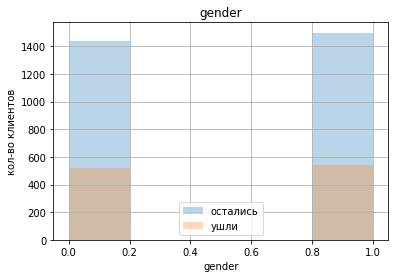

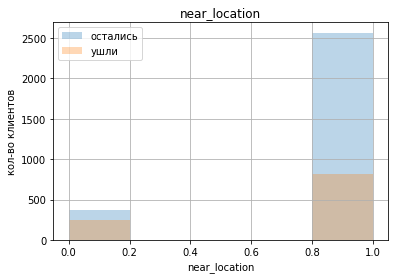

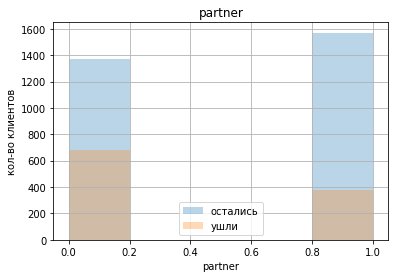

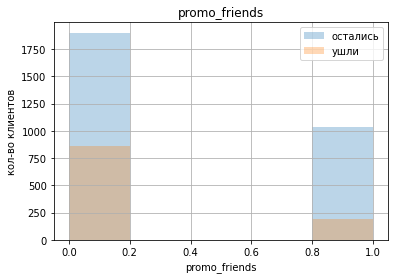

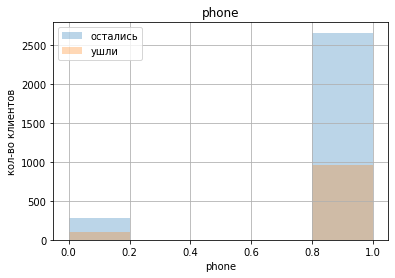

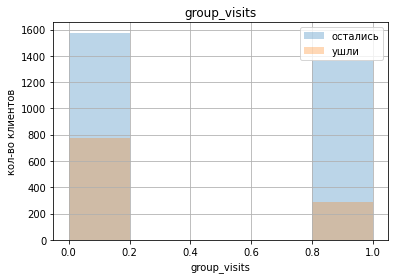

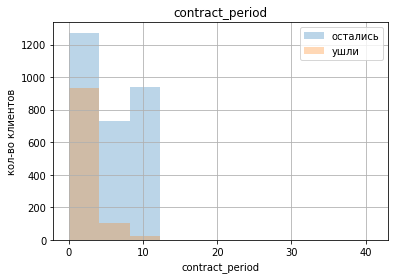

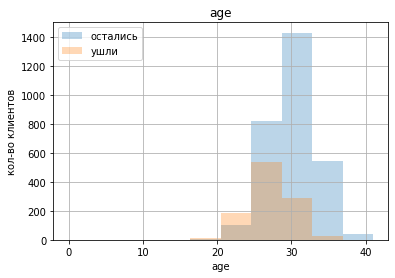

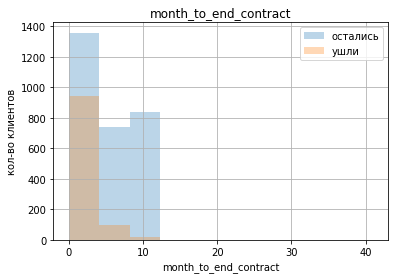

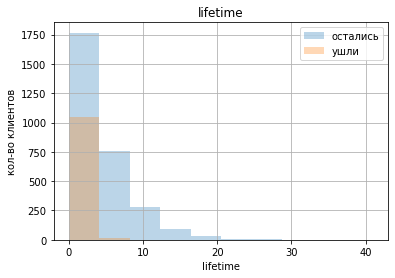

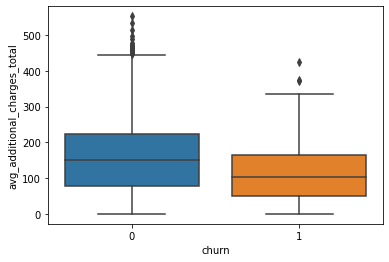

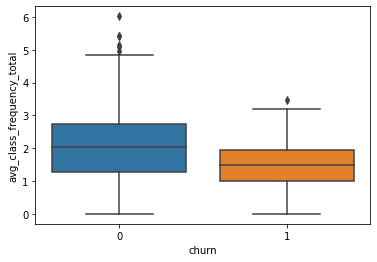

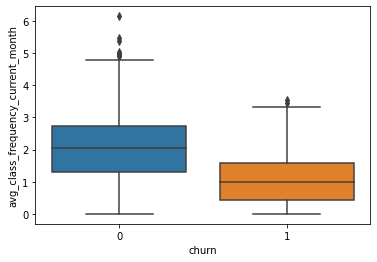

In [9]:
#построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    churn.groupby('churn')[column].hist(bins=5, range=(0, 1), alpha=0.3)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('кол-во клиентов')
    plt.legend(['остались', 'ушли'])
    plt.show()
    
for column in ['contract_period', 'age', 'month_to_end_contract', 'lifetime']:
    churn.groupby('churn')[column].hist(bins=10, range=(0, 41), alpha=0.3)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('кол-во клиентов')
    plt.legend(['остались', 'ушли'])
    plt.show()
    
for column in ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    sns.boxplot(x = 'churn', y = churn[column], data = churn)
    plt.show()

>1. Гендер не влияет на отток клиентов фитнес-клуба. Уходят как женщины, так и мужчины в равной степени  
>2. Большинство клиентов клуба проживают рядом с клубом, остается больше клиентов, которые проживают рядом. Тем, кто живет дальше уйти легче  
>3. Те, кто приходят в клуб по партнерской программе остаются чаще тех, кто не пользуется этими привилегиями. Из тех, кто не имеет отношения к партнерской программе, уходит практически каждый 2ой, в то время как те, кто в программе участвуют остаются практически 4 к 1 >4. Большинство клиентов клуба пришли не по акции "приведи друга". Таких клиентов больше практически в 2 раза. Зато те, кто пришел с друзьями остаются чаще. Процент ушедших из программы "приведи друга" всего около 20%, в то время как почти половина из тех, кто не пользовался этой акцией бросают тренировки  
>5. Наличие телефонного номера никак не влияет на отток клиентов. Тенденция одинакова.  
>6. Тех, кто посещает групповые тренировки немного меньше, тем тех, кто их не посещает. Из тех, кто групповые тренировки посещает, остается практически каждый 4й, а из тех, кто не посещает, только каждый второй. Скорее всего гипотеза о том, что людям становится скучно тренироваться самостоятельно, подтверждается.  
>7. Больше всего абонементов по 1 месяцу, на втором месте - абонементы длительностью 1 год. Месяные абонементы очень невыгодны для клуба - из тех, кто приобрел такой абонемент почти 70% уходят. А вот годовые абонементы довольно выгодны - по ним уходит около 5% людей. Примерно тоже самое можно сказать и о полугодовых абонементах - уходит только 15%  
>8. Клиенты до 25 лет самые непостоянные. Их уходит почти в 2 раза больше чем остаются. От 25 до 29 лет тенденция меняется, но все равно около 60% таких клиентов имеют тенденцию уходить. Клиентов возвраста 29-33 лет можно назвать устойчивыми. Всего 30% таких клиентов уходит. Стоит заметить, что у клуба большинство клиентов именно такого возраста. Возраст 33-37 лет можно назвать самым интереснм для клуба. Меньше 10% таких клиентов покидают клуб. Вероятнее всего стоит получше рассмотреть эту аудиторию и возможно, увеличить ее численность  
>9. Больше остается людей, у которых до окончания действия абонемента еще довольно много времени. Те, у кого остается до 3х месяцев уходят больше. Вероятнее всего здесь имеет влияние и тот факт, что у нас в принципе больше всего людей со сроком действия абонемента в 1 месяц. И это же как мы выяснили самая ненадежная группа  
>10. Чаще уходят те, у кого с момента первого обращения в фитнес-центр прошло до 3х месяцев. После 3х месяцев тенденция меняется. С увеличением срока жизни клиента, снижается и отток  
>11. Видна тенденция больщего ухода клиентов, которые не пользуются дополнительными услугами. Это обосновано, ведь лояльные клиенты чаще приходят в клуб не только на тренировку, но и просто хорошо провести время. Выпить коктейль в фитнес-баре, поболтать с товарищами, сходить на массаж и тп  
>12. Те, кто ходит регулярно около 2х раз в неделю чаще остаются, сохраняя тенденцию регулярности месяц за месяцем, а вот нерегулярные клиенты со временем становытся еще нерегулярней и в скором времени уходят  

<AxesSubplot:title={'center':'Матрица корелляций'}>

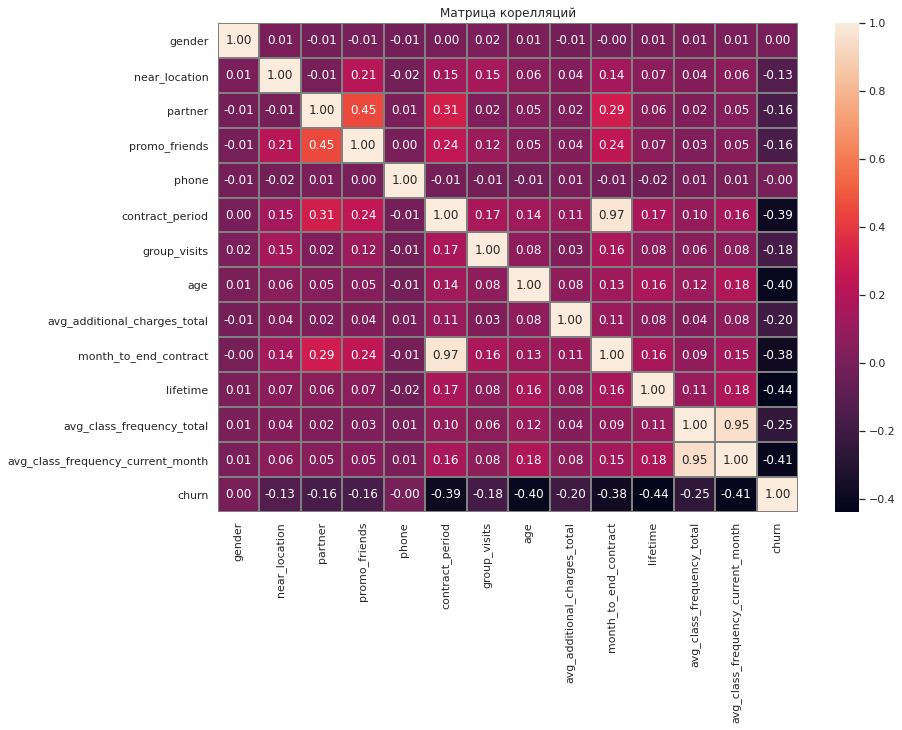

In [10]:
#строим матрицу корреляций
cm = churn.corr()
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Матрица корелляций')
sns.heatmap(cm, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

>Большинство признаков коррелирует с целевой переменной за исключением признаков 'phone' и 'gender'. Корреляция с целевой переменной у них нулевая. Никакой зависимости нет.  
В данных есть 2 пары признаков с высокой корреляцией (contract_period / month_to_end+contract и avg_class_grequency_current_month / avg_class_grequency_current_total), в рамках задачи делать с ними ничего не будем
>
>* Чем ближе к клубу, тем больше вероятность того, что клиент останется в клубе. 
>* Чем старше клиент, тем он постояннее
>* Чем больше клиент участвует в акциях (партнерская, а также приведи друга), тем чаще он остается  
>* Чем больше длительность абонемента у клиента и выше lifetime, тем чаще он остается 
>* Это же касается и частоты посещения клуба, и количества месяцев, оставшихся до истечения абонемента, а также дополнительных трат. 

## Модель прогнозирования оттока клиентов

Строим модель бинарной классификации клиентов, где целевой признак — **факт оттока клиента в следующем месяце**

In [11]:
#разделяем данные на признаки (матрица X) и целевую переменную (y)
X = churn.drop('churn', axis = 1)
y = churn['churn']

#разбиваем данные на обучающую и валидационную выборку 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=0)

In [12]:
#обучаем модель на train-выборке методами логистической регрессии и случайного леса, выводим метрики
models = [
    LogisticRegression(solver='liblinear'),
    RandomForestClassifier(n_estimators = 100, random_state=0),
]


def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )
    
for i in models:
    print(i)
    make_prediction(m=i, X_train=X_train, y_train=y_train,
                    X_test=X_test, y_test=y_test)


LogisticRegression(solver='liblinear')
Accuracy:0.93 Precision:0.89 Recall:0.83 
RandomForestClassifier(random_state=0)
Accuracy:0.92 Precision:0.88 Recall:0.83 


>1. Доля правильных ответов (метрика Accuracy) у логистической регрессии немного лучше, хотя у обеих моделей довольно высокий результат. Правильно прогнозируем 93% с помощью логистической регрессии и 92% ответов с помощью случайного леса
>2. Доля верных прогнозов (метрика Precision) также у логистической регрессии лучше. 
>3. Метрика Recall (минимизация противоположных рисков) у обеих моделей одинакова
>
>**Вывод:** модель логистической регрессии прогнозирует лучше

## Кластеризация клиентов

In [13]:
#избавимся от столбца churn
no_churn = churn.drop(['churn'], axis=1)

In [14]:
#стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(no_churn)

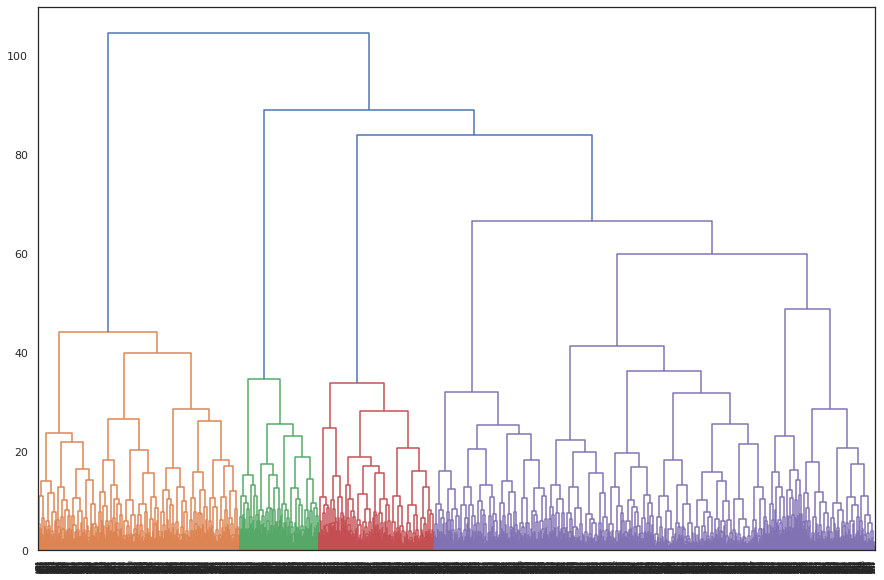

In [15]:
#строим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и рисуем дендрограмму
linked = linkage(x_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

>Число кластеров по дендрограмме - 4

In [16]:
#Обучаем модель кластеризации на основании алгоритма K-Means и прогнозируем кластеры клиентов. Число кластеров n=5 (по требованию, указанному в условии задачи)
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)
churn['cluster'] = labels

In [17]:
#Cмотрим на средние значения признаков для кластеров
churn.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


> Уже сейчас можно сказать, что из разных кластеров разный отток клиентов. Например, кластеры 2 и 3 с самым высоким оттоком клиентов, а кластеры 0 и 4 с самым низким.  
>
>Также у кластеров с высоким оттоком клиентов не все признаки схожи. Например, клиенты кластера 2 проживают близко к фитнес-клубу, а клиенты кластера 3 далеко от него. Основные клиенты второго кластера пришли по акции "приведи друга", а клиенты кластера 3 в большинстве своем не пользовались этим предложением. Зато хорошо совпадают возрастные группы и посещение групповых занятий. В других признаках есть разница, но в целом она не очень большая, поэтому эти признаки также можно считать схожими.  
>
>Кластеры 0 и 4 с низким оттоком клиентов также различаются. Например, у кластера 4 практически с нулевым оттоком клиентов есть большая зависимость от принадлжености к партнерской программе. 78% клиентов пришли именно оттуда, тогда как в кластере 0 примерно такой же процент людей в программе не участвовало. В нулевом кластере также только 27% тех, кто пришел по акции приведи друга, в то время как в 4 кластере таких людей больше 57%.  
>В четвертом кластере люди с самыми длительными абонементами.  
>Возрастная группа у обоих кластеров похожа. В среднем это люди 30 лет.
>Остальные показатели у кластеров 0 и 4 схожи, есть различия только в сроке окончания контракта, но это связано и с длительностью абонемента.  

>Самый низкий отток у клиентов кластера 4 с самыми высокими признаками. Можно сказать, что чем выше/ дольше / больше признак, тем меньше клиентов уходит из фитнес-центра

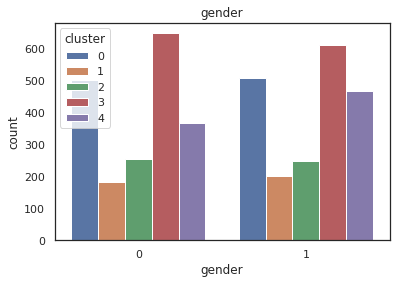

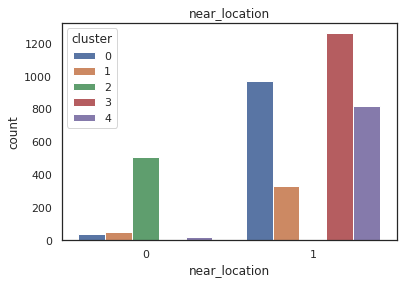

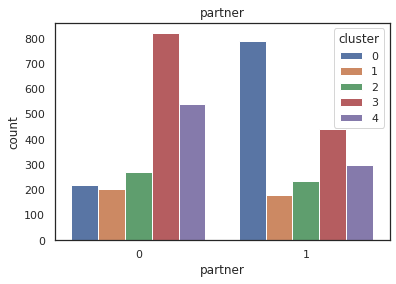

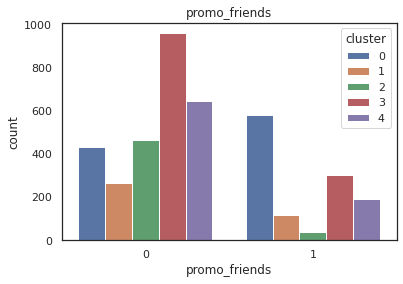

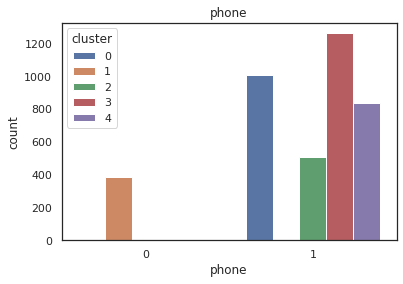

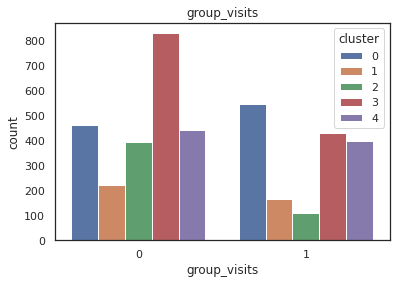

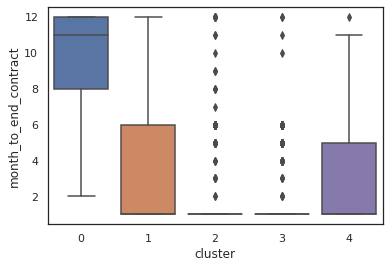

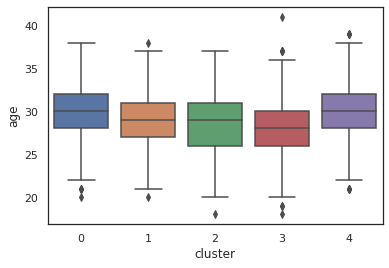

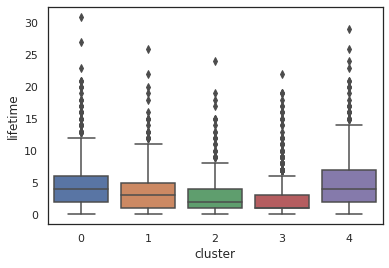

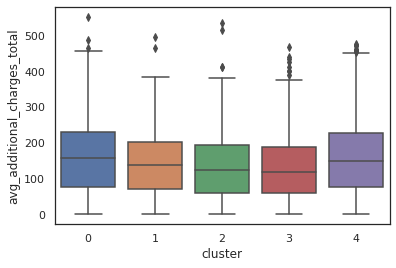

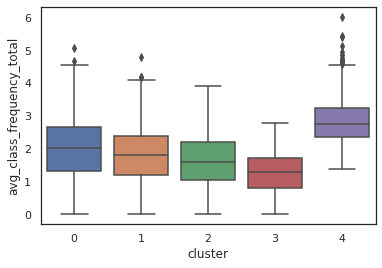

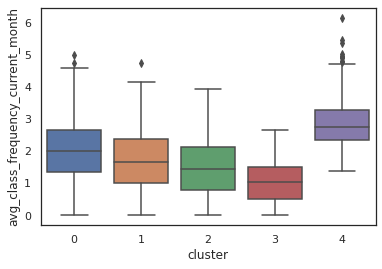

In [18]:
# построим распределения признаков для кластеров

for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    sns.countplot(x = churn[column], hue='cluster', data=churn)
    plt.title(column)
    plt.show()
    
for column in ['month_to_end_contract', 'age', 'lifetime', 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    sns.boxplot(x = 'cluster', y = churn[column], data = churn)
    plt.show()

>1. Во всех кластерах примерно одинаковое кол-во мужчин и женщин  
>2. Во всех кластерах значительно превалируют клиенты, живущие рядом с фитнес-центром. Только в 3м кластере перевес клиентов в сторону тех, кто живет дальше  
>3. В 4 кластере явное большинство клиентов пришли по партнерской программе. Во втором кластере перевес в сторону людей, в программе не участвующих  
>4. В 3, 2 и 0 кластере значительно больше тех, кто не слышал о программе "приведи друга". В целом людей, которые программой не пользуются - больше  
>5. В первый кластер попали люди, не оставившие номера телефонов. Во всех остальных кластерах люди с телефонами. Стоит ли вообще принимать во внимание этот кластер?  
>6. Во втором и третьем кластерах больше всего людей, которые не посещают групповые занятия. В остальных клстерах таких клиентов примерно поровну  
>7. В 4 кластер попали люди, у которых больше 70% абонементов сроком на 12 месяцев, а остальные сроком на 6 месяцев. В этом кластере вообще нет людей, у которых абонемент длится месяц. Во втором же кластере, наоборот, находятся клиенты, у которых около 70% абонементов всего на месяц. В певом кластере собрано число абонемнетов с разными сроками действия  
>8. В 4м кластере у большинства людей до окончания абонемента осталось порядка 12 месяцев, то есть как будто бы они только начали ходить, но уже купили годовой абонемень. Во втором кластере собрались те, у кого абонемент скоро заканчиватеся. Учитывая, что во втором кластере больше всего людей с абонементами сроком действия всего месяц, то можно считать, что и они только начали ходить, но взяли не очень длительный абонемент
>9. Большая часть клиентов 26-33 лет. В 0 и 4 кластере аудитория постарше, от 28 до 33. 
>10. Самый большой срок жизни клиентов  в 0 и 4 кластерах, самый маленький во 2м  
>11. Суммы трат немного перевешивают в 0 и 4м кластере, но в целом можно сказать, что во всех кластерах клиенты примерно одинаково тратят 
>12. Чаще всего посещают занятия люди из 0 кластера, на втором месте 4. Второй кластер можно назвать самым нерегулярным. 

In [19]:
# для каждого полученного кластера посчитаем долю оттока 
churn.groupby('cluster')['churn'].mean()*100

cluster
0     2.772277
1    26.753247
2    44.356436
3    51.426307
4     6.801909
Name: churn, dtype: float64

>1. Самый надежный - кластер номер 4, меньше 3% оттока клиентов. 
>2. На втором месте кластер 0 с долей оттока всего 6,8%
>3. Больше половины клиентов уходят из кластера 3, немногим лучше кластер 2 - высокий отток клиентов
>4. Кластер 1 можно считать средним по оттоку клиентов. 

## Результаты и базовые рекомендации по работе с клиентами

1. Кластер №4 - минимальный отток клиентов (меньше 3%)  
2. Кластер 0 - низкий отток клиентов (6,8%)  
3. Кластера 2 и 3 - высокий отток клиентов (44% и 51% сответственно) 
4. Кластер 1 - средний отток клиентов (26% оттока)  


**Признаки, наиболее сильно влияющие на отток клиентов:**  
1. Возраст. Клиентам до 30 лет менее интересно заниматься в фитнес-клубах этой сети  
2. Посещение групповых занятий. Клиенты, не посещающие групповые занятия уходят чаще  
3. Удаленность от фитнес-центра. Самый низкий отток клиентов в кластерах, где больше 95% людей проживают рядом с фитнес-клубом. Хотя есть кластер 3 с высоким оттоком клиентов проживающих рядом с фитнес клубом, все же стоит учитывать этот фактор при разработке программ лояльности. 

**Рекомендации по работе с клиентами:**

Клубу стоит сконцентрироваться на аудитории 30-33 лет, проживающих вблизи фитнес-клуба. Сработают также программы лояльности, куда будут включены предложения по интересным дополнительным услугам для лояльных клиентов. 

Возможно стоит рассмотреть расширение предложения по партнерским программам, но стоит провести дополнительное исследование, чтобы точно понять, насколько выгодны клубы такие клиенты. Возможно, скидка слишком велика. 

Также стоит рассмотреть механики, которые помогут оказать клиенту наставничество тренера, увлечь и позволить ему увидеть цель от своих занятий. Поскольку много клиентов, выбирающих зал, можно расмотреть интересные тренировки именно в зале или с тренером.  

Повысить увеличение интереса клиента к групповым занятиям. Это могут быть дополнительные занятия после основной тренировки, игровые виды спорта и другие программы, которые заинтересуют клиента

Cтоит рассмотреть интересные предложения, переводящие клиента, взявшего абонемент на месяц в более "длительного" клиента. Например, это могут быть специальные программы для участников клуба со сроком 5 недель. Это же обеспечит и регулярность посещений, а также поможет клиенту настроиться на регулярность занятий и вовлечь его в процесс.  

Для более молодой аудитории стоит сделать также предложения, которые позволят оставить именно их. Здесь нужно выполнить более глубокий анализ, возможно молодые клиенты уходят, поскольку программы клуба устарели. Можно открыть интересные драйвовые программы с использованием VR, технологий, купить супер-современные тренажеры и тп, чтобы молодой аудитории также было инетерсно. 
